In [2]:
import tensorflow as tf

# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [3]:
# import fashion mnist dataset
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
dataset

{'test': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

In [5]:
train_dataset

<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [6]:
# class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [7]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [8]:
# normalizing the pixel values, which range [0,255] into range [0,1]

def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

In [9]:
train_dataset

<CacheDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>

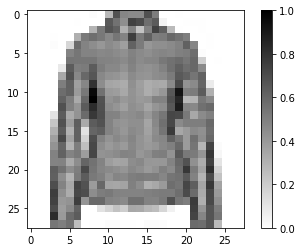

In [11]:
# plotting a single image

# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

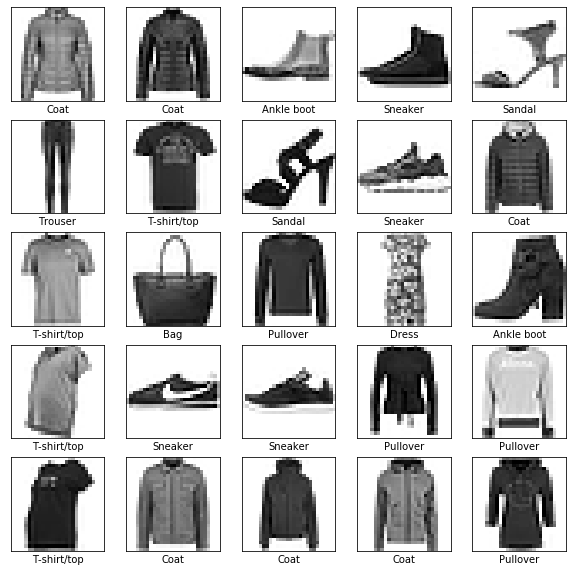

In [12]:
# plot the first 25 images


plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [14]:
# build the model
# 1 input layer
# 1 hidden dense layer
# 1 output dense layer

model = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape=(28, 28, 1)), #input, flatten 28x28 into array of length 784
                tf.keras.layers.Dense(128, activation=tf.nn.relu),
                #tf.keras.layers.Dense(64, activation=tf.nn.relu),
                tf.keras.layers.Dropout(.50),# goofin
                tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [15]:
# compile the model and specify optimizer, loss function, and training metric

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:
# define how iterating over the training dataset will occur

BATCH_SIZE = 32 # the number of exampels(batch size) to use when updating model parameters

train_dataset = train_dataset.cache().repeat() #train indefinitely

train_dataset = train_dataset.shuffle(num_train_examples) # randomize the order of the input data

train_dataset = train_dataset.batch(BATCH_SIZE) # update model parameters using batches of BATCH_SIZE

test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [36]:
# Train the model
history = model.fit(train_dataset, 
                    epochs=10, 
                    validation_data= test_dataset, # goofin
                    steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE),
                    verbose = 2)

Epoch 1/10
1875/1875 - 4s - loss: 0.3186 - accuracy: 0.8805 - val_loss: 0.3632 - val_accuracy: 0.8732
Epoch 2/10
1875/1875 - 3s - loss: 0.3127 - accuracy: 0.8825 - val_loss: 0.3529 - val_accuracy: 0.8817
Epoch 3/10
1875/1875 - 3s - loss: 0.3132 - accuracy: 0.8829 - val_loss: 0.3502 - val_accuracy: 0.8848
Epoch 4/10
1875/1875 - 3s - loss: 0.3151 - accuracy: 0.8819 - val_loss: 0.3471 - val_accuracy: 0.8829
Epoch 5/10
1875/1875 - 3s - loss: 0.3151 - accuracy: 0.8822 - val_loss: 0.3588 - val_accuracy: 0.8813
Epoch 6/10
1875/1875 - 3s - loss: 0.3082 - accuracy: 0.8832 - val_loss: 0.3590 - val_accuracy: 0.8788
Epoch 7/10
1875/1875 - 3s - loss: 0.3041 - accuracy: 0.8845 - val_loss: 0.3542 - val_accuracy: 0.8803
Epoch 8/10
1875/1875 - 3s - loss: 0.3065 - accuracy: 0.8835 - val_loss: 0.3506 - val_accuracy: 0.8820
Epoch 9/10
1875/1875 - 3s - loss: 0.3058 - accuracy: 0.8859 - val_loss: 0.3458 - val_accuracy: 0.8814
Epoch 10/10
1875/1875 - 3s - loss: 0.3018 - accuracy: 0.8855 - val_loss: 0.3584 - 

In [37]:
# evaluate the model against the training data 
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))

313/313 [==============================] - ETA: 0s - loss: 0.1833 - accuracy: 0.93 - ETA: 0s - loss: 0.3287 - accuracy: 0.88 - ETA: 0s - loss: 0.3417 - accuracy: 0.88 - ETA: 0s - loss: 0.3495 - accuracy: 0.88 - ETA: 0s - loss: 0.3487 - accuracy: 0.88 - ETA: 0s - loss: 0.3587 - accuracy: 0.88 - ETA: 0s - loss: 0.3567 - accuracy: 0.88 - 0s 1ms/step - loss: 0.3584 - accuracy: 0.8796


In [38]:
print('Accuracy on test dataset:', test_accuracy)

Accuracy on test dataset: 0.8795999884605408


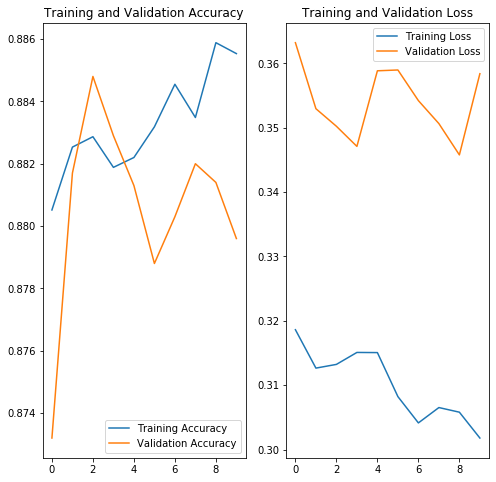

In [41]:
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [22]:
# make predictions for the images

for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [23]:
predictions.shape


(32, 10)

In [ ]:
predictions

In [25]:
predictions[0]

array([3.6075487e-04, 1.8795419e-06, 1.8765995e-02, 3.8348007e-05,
       8.4080213e-01, 1.8256431e-08, 1.4001606e-01, 7.1855082e-09,
       1.4869173e-05, 6.0791456e-09], dtype=float32)

In [26]:
np.argmax(predictions[0])

4

In [28]:
test_labels[0]

4

In [29]:
# plot the predictions

def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

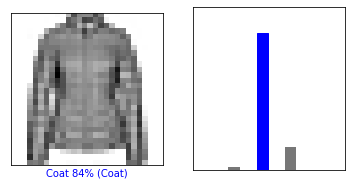

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

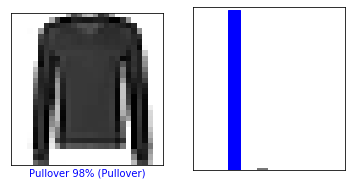

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

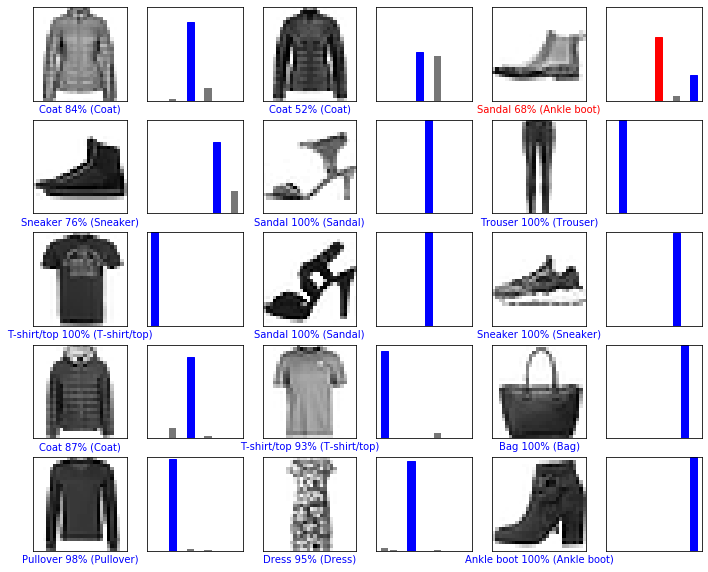

In [32]:
# multiple images
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [33]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [34]:
# Add the image to a batch where it's the only member.
# TF looks for a list of examples for predictions.

img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [35]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.6075443e-04 1.8795387e-06 1.8765975e-02 3.8347942e-05 8.4080231e-01
  1.8256399e-08 1.4001589e-01 7.1855095e-09 1.4869148e-05 6.0791354e-09]]


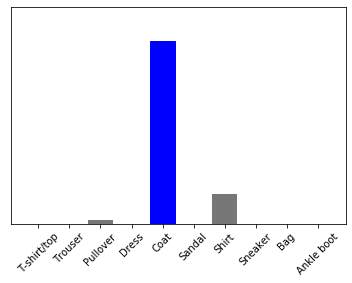

In [36]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [37]:
np.argmax(predictions_single[0])

4